In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [30]:
#x, y=make_blobs(random_state=0)
x, y=make_blobs(random_state=1)

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [32]:
print(kmeans.predict(x))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


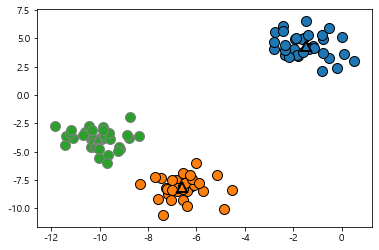

In [33]:
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], 
                        kmeans.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2)
plt.show()

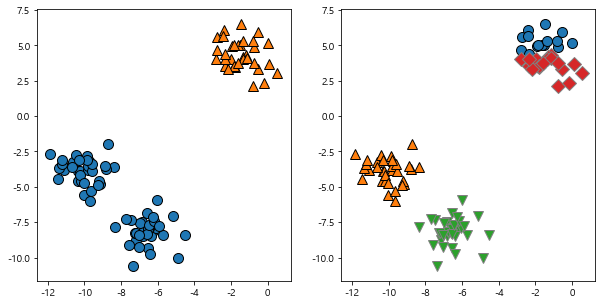

In [34]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
#2개
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[0])

#4개
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[1])

- KMeans로 군집분석이 되지 않는 사례

In [35]:
x, y = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

pred=kmeans.predict(x)

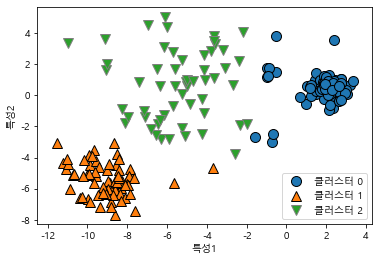

In [37]:
mglearn.discrete_scatter(x[:,0], x[:,1],pred)
#                                                     최선의 위치에 범례를 줘라
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.xlabel('특성1')
plt.ylabel('특성2')
plt.show()

- 실패사례2

In [38]:
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
x=np.dot(x, transformation)

#kmeans적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred = kmeans.predict(x)

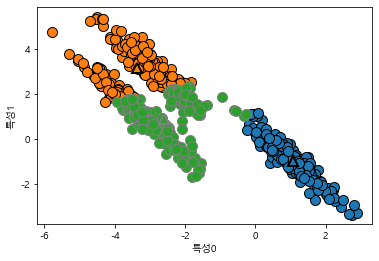

In [39]:
mglearn.discrete_scatter(x[:, 0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                        kmeans.cluster_centers_[:, 1], [0,1,2],
                        markers='^', markeredgewidth=2)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

- 실패 사례 3

In [40]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [41]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

Text(0, 0.5, '특성 1')

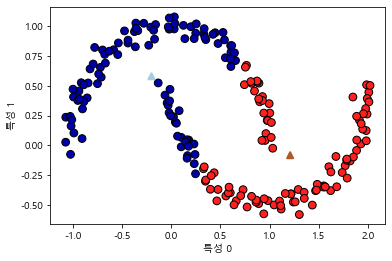

In [42]:
plt.scatter(x[:,0], x[:,1], c=pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
             marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')

plt.xlabel('특성 0')
plt.ylabel('특성 1')